[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-cd75f18199c3>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series


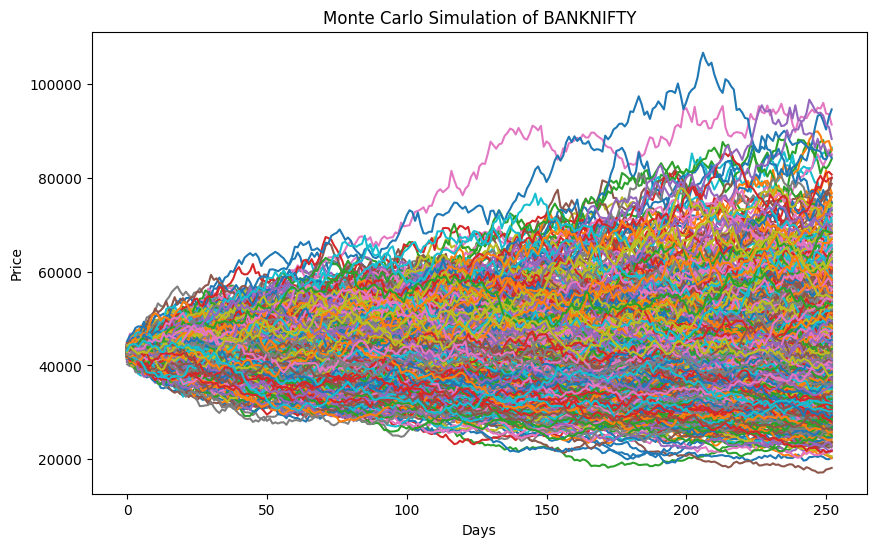

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Load Historical Data
ticker = '^NSEBANK'  # BANKNIFTY ticker symbol
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
prices = data['Close']

# Step 2: Calculate Daily Returns
returns = prices.pct_change().dropna()

# Step 3: Monte Carlo Simulation
num_simulations = 1000
num_days = 252  # Number of trading days in a year
last_price = prices[-1]

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_volatility = returns.std()
    price_series = []

    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)

    for y in range(num_days):
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1

    simulation_df[x] = price_series

# Step 4: Visualize Results
plt.figure(figsize=(10, 6))
plt.plot(simulation_df)
plt.title('Monte Carlo Simulation of BANKNIFTY')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-ebd53b78d956>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series
<ipython-input-2-ebd53b78d956>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df['mean'] = simulation_df.mean(axis=1)
<ipython-input-2-ebd53b78d956>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

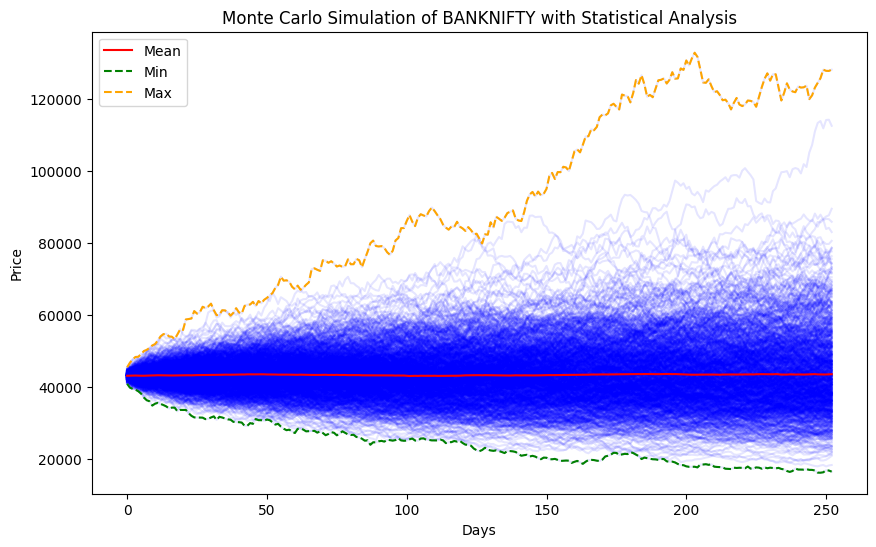

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Load Historical Data
ticker = '^NSEBANK'  # BANKNIFTY ticker symbol
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
prices = data['Close']

# Calculate Daily Returns
returns = prices.pct_change().dropna()

# Monte Carlo Simulation
num_simulations = 1000
num_days = 252  # Number of trading days in a year
last_price = prices[-1]

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_volatility = returns.std()
    price_series = []

    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)

    for y in range(num_days):
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1

    simulation_df[x] = price_series

# Statistical Analysis
simulation_df['mean'] = simulation_df.mean(axis=1)
simulation_df['min'] = simulation_df.min(axis=1)
simulation_df['max'] = simulation_df.max(axis=1)

# Visualize Results
plt.figure(figsize=(10, 6))
plt.plot(simulation_df.iloc[:, :num_simulations], color='blue', alpha=0.1)
plt.plot(simulation_df['mean'], color='red', label='Mean')
plt.plot(simulation_df['min'], color='green', linestyle='--', label='Min')
plt.plot(simulation_df['max'], color='orange', linestyle='--', label='Max')
plt.title('Monte Carlo Simulation of BANKNIFTY with Statistical Analysis')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
<ipython-input-3-ea7f292800c4>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series
<ipython-input-3-ea7f292800c4>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df['mean'] = simulation_df.mean(axis=1)
<ipython-input-3-ea7f292800c4>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

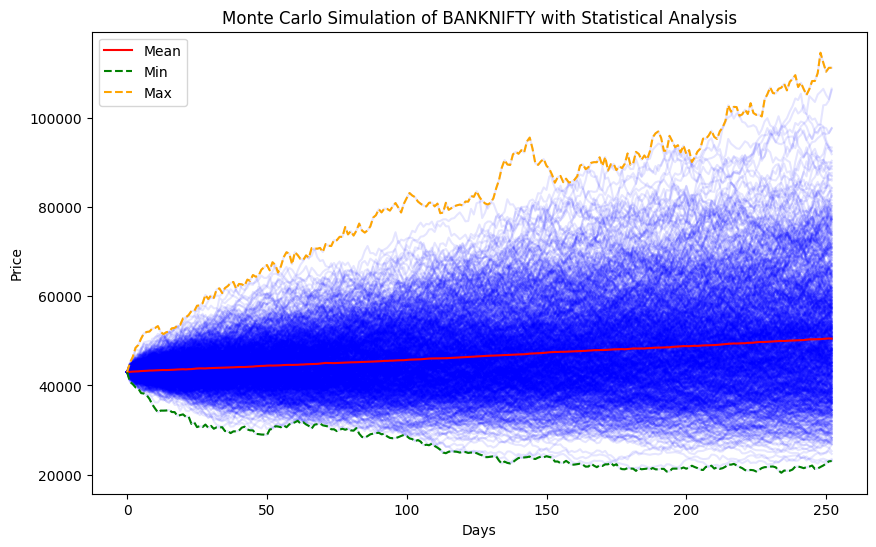

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Load Historical Data
ticker = '^NSEBANK'  # BANKNIFTY ticker symbol
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
prices = data['Close']

# Calculate Daily Returns
returns = prices.pct_change().dropna()

# Parameters for GBM
num_simulations = 1000
num_days = 252  # Number of trading days in a year
last_price = prices[-1]
mu = returns.mean()  # Mean daily return
sigma = returns.std()  # Daily volatility

# Monte Carlo Simulation
simulation_df = pd.DataFrame()

for x in range(num_simulations):
    price_series = [last_price]

    for y in range(num_days):
        drift = mu - (0.5 * sigma ** 2)
        shock = sigma * np.random.normal()
        price = price_series[-1] * np.exp(drift + shock)
        price_series.append(price)

    simulation_df[x] = price_series

# Statistical Analysis
simulation_df['mean'] = simulation_df.mean(axis=1)
simulation_df['min'] = simulation_df.min(axis=1)
simulation_df['max'] = simulation_df.max(axis=1)

# Visualize Results
plt.figure(figsize=(10, 6))
plt.plot(simulation_df.iloc[:, :num_simulations], color='blue', alpha=0.1)
plt.plot(simulation_df['mean'], color='red', label='Mean')
plt.plot(simulation_df['min'], color='green', linestyle='--', label='Min')
plt.plot(simulation_df['max'], color='orange', linestyle='--', label='Max')
plt.title('Monte Carlo Simulation of BANKNIFTY with Statistical Analysis')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
